**Environment Setup**

In [1]:
#Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!unzip -qq 'drive/My Drive/CarND-Behavioral-Cloning-P3/data/IMG'

In [3]:
#Set up tensorflow 1.3.0 gpu version to match carnd-term1 environment
!pip install tensorflow-gpu==1.3.0

     |████████████████████████████████| 159.1MB 32kB/s 
     |████████████████████████████████| 1.6MB 46.1MB/s 
     |████████████████████████████████| 890kB 56.2MB/s 
  Created wheel for html5lib: filename=html5lib-0.9999999-cp36-none-any.whl size=107220 sha256=bc23b96ea3066665654d343af910fdafea471ab9d286c4efa4d0cb1d517b6769
  Stored in directory: /root/.cache/pip/wheels/50/ae/f9/d2b189788efcf61d1ee0e36045476735c838898eef1cad6e29
Successfully built html5lib
  Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Found existing installation: bleach 3.1.5
    Uninstalling bleach-3.1.5:
      Successfully uninstalled bleach-3.1.5


In [4]:
#Set up keras 2.0.9 version
!pip install keras==2.0.9

     |████████████████████████████████| 307kB 4.5MB/s 
ERROR: textgenrnn 1.4.1 has requirement keras>=2.1.5, but you'll have keras 2.0.9 which is incompatible.
  Found existing installation: Keras 2.3.1
    Uninstalling Keras-2.3.1:
      Successfully uninstalled Keras-2.3.1


In [5]:
#Downgrade cuda to 8.0 version
!wget https://developer.nvidia.com/compute/cuda/8.0/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
!dpkg -i cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
!apt-get update
!apt-get install cuda=8.0.61-1

--2020-06-10 14:07:30--  https://developer.nvidia.com/compute/cuda/8.0/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
Resolving developer.nvidia.com (developer.nvidia.com)... 152.199.0.24
Connecting to developer.nvidia.com (developer.nvidia.com)|152.199.0.24|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://developer.download.nvidia.com/compute/cuda/8.0/secure/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64.deb?AjNFXSwiD2oMzjGpMa8Uh_axmztzlq_gkNf8DmXoKiA-LqtvTeJmWtxZjVCV-y1SbeQzI6FlCS6qSSHPegueCyuIZENVfGcp9s_HROqfULgrLykH0V-mIgwcwrrsqz0pt4N82fN-r8EgxqByuqINF6k5o7iEvdK2hjJt96RvTlSqbjvKZm85qTiNQqiP4IV8YqJgrBfYOUq3v_uJbVGRRDdOuw [following]
--2020-06-10 14:07:30--  https://developer.download.nvidia.com/compute/cuda/8.0/secure/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64.deb?AjNFXSwiD2oMzjGpMa8Uh_axmztzlq_gkNf8DmXoKiA-LqtvTeJmWtxZjVCV-y1SbeQzI6FlCS6qSSHPegueCyuIZENVfGcp9s

In [6]:
#Downgrade cuDnn to 6.0 version (package pre-downloaded
# and uploaded to colab because it requires Nvidia developer account)
!dpkg -i "libcudnn6_6.0.21-1+cuda8.0_amd64.deb"
!ls -l /usr/lib/x86_64-linux-gnu/libcudnn.so.6*

Selecting previously unselected package libcudnn6.
(Reading database ... 153562 files and directories currently installed.)
Preparing to unpack libcudnn6_6.0.21-1+cuda8.0_amd64.deb ...
Unpacking libcudnn6 (6.0.21-1+cuda8.0) ...
Setting up libcudnn6 (6.0.21-1+cuda8.0) ...
Processing triggers for libc-bin (2.27-3ubuntu1) ...
/sbin/ldconfig.real: /usr/local/lib/python3.6/dist-packages/ideep4py/lib/libmkldnn.so.0 is not a symbolic link

lrwxrwxrwx 1 root root        18 Apr 12  2017 /usr/lib/x86_64-linux-gnu/libcudnn.so.6 -> libcudnn.so.6.0.21
-rw-r--r-- 1 root root 154322864 Apr 12  2017 /usr/lib/x86_64-linux-gnu/libcudnn.so.6.0.21


In [7]:
#Make sure GPU is downgraded correctly. For runtime type choose "None"
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2016 NVIDIA Corporation
Built on Tue_Jan_10_13:22:03_CST_2017
Cuda compilation tools, release 8.0, V8.0.61


In [8]:
#Check GPU
import tensorflow as tf
tf.test.gpu_device_name()
#print(tf.__version__)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:458: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:459: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:460: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:461: FutureWarning: Passing (type, 1) or 

'/gpu:0'

In [9]:
#Check keras version
import keras
print(keras.__version__)

2.0.9


Using TensorFlow backend.


**Load The Data Using Generator**

In [0]:
#if google faced disconnection with mounted drive issue, just stop and re-run, 
#or it will run forever
import os
import csv
import cv2
import numpy as np
import sklearn

path = 'drive/My Drive/CarND-Behavioral-Cloning-P3/data/'
samples =[]
with open(path+'driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        samples.append(line)

from sklearn.model_selection import train_test_split
train_samples, validation_samples = train_test_split(samples, test_size=0.2)

def generator(samples, batch_size=128):
    num_samples = len(samples)
    correction = 0.3
    while 1: #loop forever so the generator never terminates
        sklearn.utils.shuffle(samples)
        for offset in range(0, num_samples, batch_size):
            batch_samples = samples[offset:offset+batch_size]

            images = []
            measurements = []
            for batch_sample in batch_samples:
            #add center images
                source_path = batch_sample[0]
                filename = source_path.split('/')[-1]
                current_path = 'IMG/' + filename
                center_image = cv2.imread(current_path)
                images.append(center_image)
                center_measurement = float(batch_sample[3])
                measurements.append(center_measurement)
            #data augmentation, flip center images horizontally and take 
            #the opposite sign of the steering measurement to help with the left trun bias
                images.append(cv2.flip(center_image,1))
                measurements.append(center_measurement*-1.0)
                
            #add left and right images
                source_path = batch_sample[1]
                filename = source_path.split('/')[-1]
                current_path = 'IMG/' + filename
                left_image = cv2.imread(current_path)
                images.append(left_image)
                left_measurement = float(batch_sample[3]) + correction
                measurements.append(left_measurement)
                source_path = batch_sample[2]
                filename = source_path.split('/')[-1]
                current_path = 'IMG/' + filename
                right_image = cv2.imread(current_path)
                images.append(right_image)
                right_measurement = float(batch_sample[3]) - correction
                measurements.append(right_measurement)
                

            X_train = np.array(images)
            y_train = np.array(measurements)
            yield sklearn.utils.shuffle(X_train, y_train)

**Training Network Architecture**

In [0]:
from keras.models import Sequential
from keras.layers import Cropping2D, Lambda, Convolution2D, Flatten, Dense, Dropout

# compile and train the model using the generator function
train_generator = generator(train_samples, batch_size=128)
validation_generator = generator(validation_samples, batch_size=128)

model = Sequential()
#set up lambda layer to normalize and mean-center the image, every pixel now ranges from -0.5 to 0.5
model.add(Lambda(lambda x: (x / 255.0) - 0.5, input_shape=(160,320,3)))
#crop distracting features (skies, trees, etc.)
model.add(Cropping2D(cropping=((70,25),(0,0))))
#implementing NVIDIA Architecture
model.add(Convolution2D(24,(5,5), strides=(2,2), activation="relu"))
model.add(Convolution2D(36,(5,5), strides=(2,2), activation="relu"))
model.add(Convolution2D(48,(5,5), strides=(2,2), activation="relu"))
model.add(Convolution2D(64,(3,3), activation="relu"))
model.add(Convolution2D(64,(3,3), activation="relu"))
model.add(Flatten())
model.add(Dense(100))
model.add(Dropout(0.5))
model.add(Dense(50))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Dropout(0.5))
model.add(Dense(1))

**Train and Evaluate the Data**

Epoch 1/10
6428/6428 [==============================] - 2626s 408ms/step - loss: 0.0135 - acc: 0.2714 - val_loss: 0.0193 - val_acc: 0.2755
Epoch 2/10
6428/6428 [==============================] - 2619s 407ms/step - loss: 0.0096 - acc: 0.2715 - val_loss: 0.0188 - val_acc: 0.2755
Epoch 3/10
6428/6428 [==============================] - 2627s 409ms/step - loss: 0.0093 - acc: 0.2715 - val_loss: 0.0182 - val_acc: 0.2755
Epoch 4/10
6428/6428 [==============================] - 2628s 409ms/step - loss: 0.0100 - acc: 0.2715 - val_loss: 0.0186 - val_acc: 0.2755
Epoch 5/10
6428/6428 [==============================] - 2650s 412ms/step - loss: 0.0090 - acc: 0.2715 - val_loss: 0.0179 - val_acc: 0.2755
Epoch 6/10
6428/6428 [==============================] - 2640s 411ms/step - loss: 0.0096 - acc: 0.2715 - val_loss: 0.0192 - val_acc: 0.2755
Epoch 7/10
6428/6428 [==============================] - 2633s 410ms/step - loss: 0.0087 - acc: 0.2715 - val_loss: 0.0175 - val_acc: 0.2753
Epoch 8/10
6428/6428 [=====

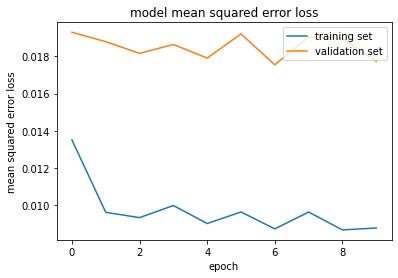

In [12]:
from keras.models import Model
import matplotlib.pyplot as plt

model.compile(loss='mse', optimizer='adam', metrics = ['accuracy'])
history_object = model.fit_generator(train_generator, steps_per_epoch =
                                     len(train_samples), validation_data = 
                                     validation_generator,
                                     validation_steps = len(validation_samples), 
                                     epochs=10, verbose=1)

### print the keys contained in the history object
print(history_object.history.keys())

### plot the training and validation loss for each epoch
plt.plot(history_object.history['loss'])
plt.plot(history_object.history['val_loss'])
plt.title('model mean squared error loss')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
plt.show()

model_save_name = 'model.h5'
save_path = F"drive/My Drive/CarND-Behavioral-Cloning-P3/{model_save_name}"
model.save(save_path)